The value of β0 is [-0.04577062]
The value of β1 is [0.2512737]
The value of β2 is [0.012192]
The value of β3 is [0.83455612]
Root mean squared error of the model is 1.1574016688494877.


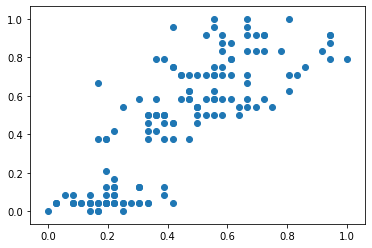

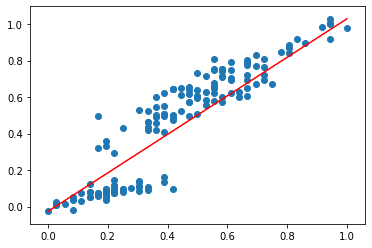

"\nfig, axs = plt.subplots(1, 4, figsize=(10, 4), sharey=True)\naxs[0].scatter(X_train[:, 0], y)\naxs[0].plot(X_train[:, 0], predicted_values)\naxs[1].scatter(X_train[:, 1], y)\naxs[1].plot(X_train[:, 1], predicted_values, lw=4,\n            c='orange', label='Regression Line')\naxs[2].scatter(X_train[:, 2], y)\naxs[2].plot(X_train[:, 2], predicted_values, lw=4,\n            c='orange', label='Regression Line')\naxs[3].plot(all_losses)\nplt.xlabel('x', fontsize='20')\nplt.ylabel('y', fontsize='20')\nplt.show()\n"

In [7]:
import numpy as np
import matplotlib.pyplot as plt

dataset = np.genfromtxt("iris.csv", delimiter=",")
low, high = np.amin(dataset, axis=0), np.amax(dataset, axis=0)
for j in range(4):
    minimum, maximum = low[j], high[j]
    for i in range(150):
        dataset[i][j] = (dataset[i][j] - minimum)/(maximum - minimum)
data = dataset[:, [0, 1, 2, 3]]
training_data = data[0:150, :]
X_train, y_train = training_data[:, [0, 1, 2]], training_data[:, 3]
X_train = X_train.reshape((150, 3))
y_train = y_train.reshape((150, 1))


x = np.c_[np.ones((X_train.shape[0], 1)), X_train]
y = y_train

lr = 0.05
epochs = 1000
w = np.random.rand(x.shape[1], 1)
all_losses = [0]*epochs
m = x.shape[0]

for _ in range(epochs):
    y_pred = np.dot(x, w)
    residuals = y_pred - y
    gradient_vector = np.dot(x.T, residuals)/m
    w = w - lr * gradient_vector
    epoch_loss = np.sum((residuals ** 2)) / (2 * m)
    all_losses.append(epoch_loss)

predicted_values = np.dot(x, w)
beta_0, beta_1, beta_2, beta_3 = w[0], w[1], w[2], w[3]
rmse = np.sqrt(np.sum((y - predicted_values) ** 2))

print('The value of β0 is {}'.format(beta_0))
print('The value of β1 is {}'.format(beta_1))
print('The value of β2 is {}'.format(beta_2))
print('The value of β3 is {}'.format(beta_3))
print('Root mean squared error of the model is {}.'.format(rmse))

A = X_train[:, 0]
Y_pred = y
plt.scatter(A, Y_pred)
plt.show()

Y_pred = predicted_values
plt.scatter(A, Y_pred)
plt.plot([min(A), max(A)], [min(Y_pred), max(Y_pred)], color='red')
plt.show()